In [126]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

In [127]:
clf = Sequential()

In [128]:
# Step 1 - add convolution
clf.add(Convolution2D(32, 3, 3, input_shape=(64, 64, 3), activation='relu'))
# Step 2 - add pooling
clf.add(MaxPool2D(pool_size=(2, 2)))
# Step 3 - add flattening
clf.add(Flatten())
# Step 4 - full connection
clf.add(Dense(128, activation='relu'))
clf.add(Dense(1, activation='sigmoid'))

In [129]:
clf.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 21, 21, 32)        896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 10, 10, 32)       0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 3200)              0         
                                                                 
 dense_12 (Dense)            (None, 128)               409728    
                                                                 
 dense_13 (Dense)            (None, 1)                 129       
                                                                 
Total params: 410,753
Trainable params: 410,753
Non-trainable params: 0
________________________________________________

In [130]:
clf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [131]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

In [132]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [133]:
training_set = train_datagen.flow_from_directory(directory='./data/training_set/',
                                                 target_size=(64, 64),
                                                 batch_size=32,
                                                 class_mode='binary')

Found 8000 images belonging to 2 classes.


In [134]:
test_set = test_datagen.flow_from_directory(directory='./data/test_set/',
                                            target_size=(64, 64),
                                            batch_size=32,
                                            class_mode='binary')

Found 2000 images belonging to 2 classes.


In [136]:
history = clf.fit_generator(generator=training_set,
                            steps_per_epoch=199,
                            epochs=5, # STOPS IMPROVING AFTER 5 EPOCHS
                            validation_data=test_set)

Epoch 1/5
  1/199 [..............................] - ETA: 11s - loss: 0.4536 - accuracy: 0.7812

/var/folders/7g/cgf84kh50nz2xnzmyw4qqrj40000gn/T/ipykernel_93935/2909700951.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = clf.fit_generator(generator=training_set,


199/199 [==============================] - 14s 69ms/step - loss: 0.5137 - accuracy: 0.7445 - val_loss: 0.5711 - val_accuracy: 0.7050
Epoch 2/5
199/199 [==============================] - 13s 66ms/step - loss: 0.5035 - accuracy: 0.7522 - val_loss: 0.5321 - val_accuracy: 0.7475
Epoch 3/5
199/199 [==============================] - 13s 66ms/step - loss: 0.4973 - accuracy: 0.7491 - val_loss: 0.5362 - val_accuracy: 0.7475
Epoch 4/5
199/199 [==============================] - 13s 66ms/step - loss: 0.4976 - accuracy: 0.7557 - val_loss: 0.5478 - val_accuracy: 0.7485
Epoch 5/5
199/199 [==============================] - 14s 68ms/step - loss: 0.4872 - accuracy: 0.7622 - val_loss: 0.5187 - val_accuracy: 0.7540


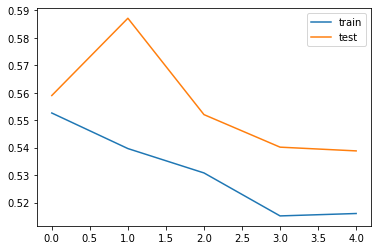

In [83]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [121]:
test_image = image.load_img('./data/cat3.jpeg', target_size=(64, 64))

In [122]:
test_image = image.img_to_array(test_image)

In [123]:
test_image = np.expand_dims(test_image, axis=0)

In [124]:
result = clf.predict(test_image)

In [125]:
if result[0][0] >= 0.5:
    print('Its a dog!')
else:
    print('Its a cat!')

Its a cat!


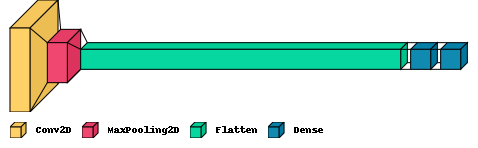

In [110]:
import visualkeras
visualkeras.layered_view(clf, legend=True)